# Final Project Code

### Importing libraries and dataset

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay , roc_curve, precision_recall_curve , auc
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.ensemble import RandomForestClassifier

## Objectives : 
- Predicting Poverty Levels: Predict the percentage of the population below the poverty level based on demographic and employment data. This is a regression problem where the target variable would be the "Percent below poverty level; Estimate; Population for whom poverty status is determined".
- Classifying Areas Based on Economic Status: Classify geographical areas into categories (e.g., high, medium, low poverty) based on various socio-economic factors. This is a classification problem where you would first need to define thresholds for poverty levels to categorize the data.

## Understanding the Dataset

In [419]:
data = pd.read_excel("D:\povertyraceemploymentage.xlsx")
print("\nBy inspecting the head of the data, you can get an initial understanding of the format of the dataset and the types of information it contains.\n")
data.head()


By inspecting the head of the data, you can get an initial understanding of the format of the dataset and the types of information it contains.



,GEOID,Total; Estimate; Population for whom poverty status is determined,Percent below poverty level; Estimate; Population for whom poverty status is determined,Total; Estimate; AGE - Under 18 years,Total; Estimate; AGE - 18 to 64 years - 18 to 34 years,Total; Estimate; AGE - 18 to 64 years - 35 to 64 years,Total; Estimate; AGE - 65 years and over,Percent below poverty level; Estimate; SEX - Male,Percent below poverty level; Estimate; SEX - Female,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - American Indian and Alaska Native alone,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Native Hawaiian and Other Pacific Islander alone,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Employed,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Unemployed
0,10,2970,23.3,781,750,1126,313,21.1,25.4,20.8,24.0,-,1369,1086,283
1,20,25421,14.2,2307,2583,10079,10452,13.5,15.1,12.8,19.5,23.4,10513,9606,907
2,50,613,25.4,212,128,161,112,25.1,25.7,23.5,25.0,-,270,215,55
3,80,6088,28.1,1803,1379,2093,813,27.0,29.1,24.3,32.4,-,2420,2154,266
4,95,0,-,0,0,0,0,-,-,-,-,-,0,0,0


## Data Cleaning
#### This code snippet effectively cleans and prepares specific data columns in a pandas DataFrame. It handles missing data represented by '-' and converts percentage values into a usable numerical format for further analysis

In [420]:
cols_to_convert = [
    'Percent below poverty level; Estimate; Population for whom poverty status is determined',
    'Percent below poverty level; Estimate; SEX - Male',
    'Percent below poverty level; Estimate; SEX - Female',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - American Indian and Alaska Native alone',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Native Hawaiian and Other Pacific Islander alone'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].replace('-', np.nan), errors='coerce')

missing_data_summary = data[cols_to_convert].isnull().sum()

print(missing_data_summary)

imputer = SimpleImputer(strategy='median')
cols_to_impute = [
    'Percent below poverty level; Estimate; Population for whom poverty status is determined',
    'Percent below poverty level; Estimate; SEX - Male',
    'Percent below poverty level; Estimate; SEX - Female',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - American Indian and Alaska Native alone',
    'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Native Hawaiian and Other Pacific Islander alone'
]

data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])
data[cols_to_impute].isnull().sum()

data.head()


Percent below poverty level; Estimate; Population for whom poverty status is determined                                          83
Percent below poverty level; Estimate; SEX - Male                                                                                90
Percent below poverty level; Estimate; SEX - Female                                                                              84
Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone                                         125
Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - American Indian and Alaska Native alone             129
Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Native Hawaiian and Other Pacific Islander alone    480
dtype: int64


,GEOID,Total; Estimate; Population for whom poverty status is determined,Percent below poverty level; Estimate; Population for whom poverty status is determined,Total; Estimate; AGE - Under 18 years,Total; Estimate; AGE - 18 to 64 years - 18 to 34 years,Total; Estimate; AGE - 18 to 64 years - 35 to 64 years,Total; Estimate; AGE - 65 years and over,Percent below poverty level; Estimate; SEX - Male,Percent below poverty level; Estimate; SEX - Female,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - American Indian and Alaska Native alone,Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Native Hawaiian and Other Pacific Islander alone,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Employed,Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Unemployed
0,10,2970,23.3,781,750,1126,313,21.1,25.4,20.8,24.0,0.0,1369,1086,283
1,20,25421,14.2,2307,2583,10079,10452,13.5,15.1,12.8,19.5,23.4,10513,9606,907
2,50,613,25.4,212,128,161,112,25.1,25.7,23.5,25.0,0.0,270,215,55
3,80,6088,28.1,1803,1379,2093,813,27.0,29.1,24.3,32.4,0.0,2420,2154,266
4,95,0,23.3,0,0,0,0,22.3,24.2,11.8,27.4,0.0,0,0,0


## Data Transformation
#### This code snippet prepares the data for machine learning by selecting features, defining the target variable, splitting the data into training and testing sets, and performing data scaling

In [421]:
features = data[['Total; Estimate; Population for whom poverty status is determined',
                 'Total; Estimate; AGE - Under 18 years',
                 'Total; Estimate; AGE - 18 to 64 years - 18 to 34 years',
                 'Total; Estimate; AGE - 18 to 64 years - 35 to 64 years',
                 'Total; Estimate; AGE - 65 years and over',
                 'Percent below poverty level; Estimate; SEX - Male',
                 'Percent below poverty level; Estimate; SEX - Female',
                 'Percent below poverty level; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - White alone',
                 'Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over',
                 'Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Employed',
                 'Total; Estimate; EMPLOYMENT STATUS - Civilian labor force 16 years and over - Unemployed']]
target = data['Percent below poverty level; Estimate; Population for whom poverty status is determined']

print("\nBy normalizing the features, we ensure that each feature contributes equally to the clustering process, preventing features with larger scales from dominating the distance calculations.\n")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)



By normalizing the features, we ensure that each feature contributes equally to the clustering process, preventing features with larger scales from dominating the distance calculations.

[[-0.14457991 -0.14205522 -0.13885744 ... -0.14224919 -0.14191389
  -0.13952301]
 [-0.15053513 -0.14996004 -0.14804865 ... -0.14784632 -0.14657383
  -0.15726502]
 [-0.15831961 -0.1597392  -0.15367046 ... -0.15266846 -0.15049556
  -0.17378345]
 ...
 [-0.15850254 -0.15949473 -0.1542951  ... -0.153099   -0.15086467
  -0.17500703]
 [-0.14516933 -0.1364322  -0.13903591 ... -0.14285196 -0.14458989
  -0.1126041 ]
 [-0.09120645 -0.08199487 -0.0641677  ... -0.10100269 -0.10297338
  -0.06977856]]
[[-0.15897001 -0.1609616  -0.15500898 ... -0.153099   -0.15086467
  -0.17500703]
 [-0.14051491 -0.14507046 -0.13778662 ... -0.13656596 -0.13467021
  -0.15481785]
 [-0.14289293 -0.14026237 -0.13957132 ... -0.14087144 -0.14002223
  -0.14502916]
 ...
 [-0.15768954 -0.16006518 -0.15233193 ... -0.15197958 -0.14975735
  -0.1

## Exploratory Data Analysis (EDA)

Bar Plot

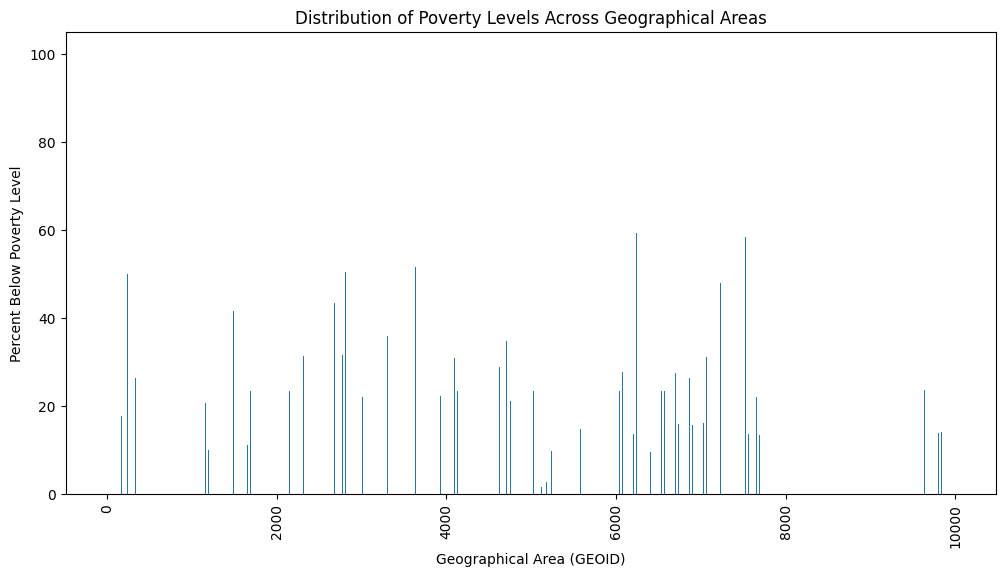

In [422]:
plt.figure(figsize=(12, 6))
plt.bar(data['GEOID'], data['Percent below poverty level; Estimate; Population for whom poverty status is determined'])
plt.xlabel('Geographical Area (GEOID)')
plt.ylabel('Percent Below Poverty Level')
plt.title('Distribution of Poverty Levels Across Geographical Areas')
plt.xticks(rotation=90) 
plt.show()

Correlation Matrix

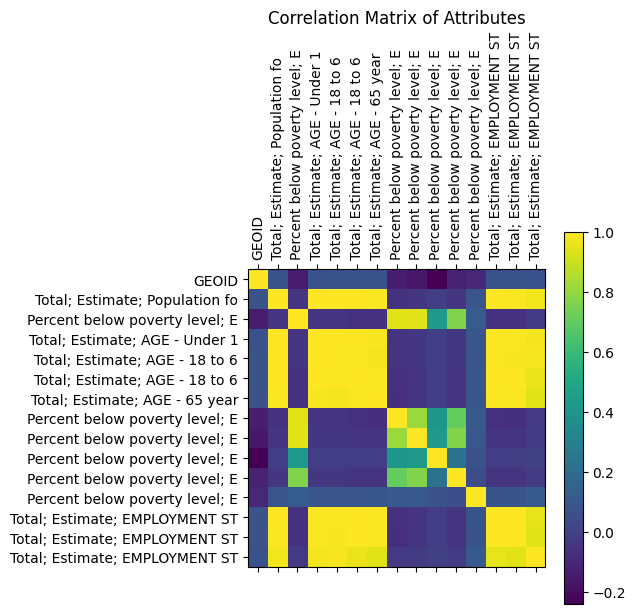

In [423]:
correlation_matrix = data.corr()

truncated_feature_names = [name[:30] for name in correlation_matrix.columns]

# plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix of Attributes')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), truncated_feature_names, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), truncated_feature_names)
plt.show()

# Indepth Analysis

## Linear Regression

#### This code block focuses on training, evaluating, and visualizing the performance of a linear regression model for predicting poverty levels

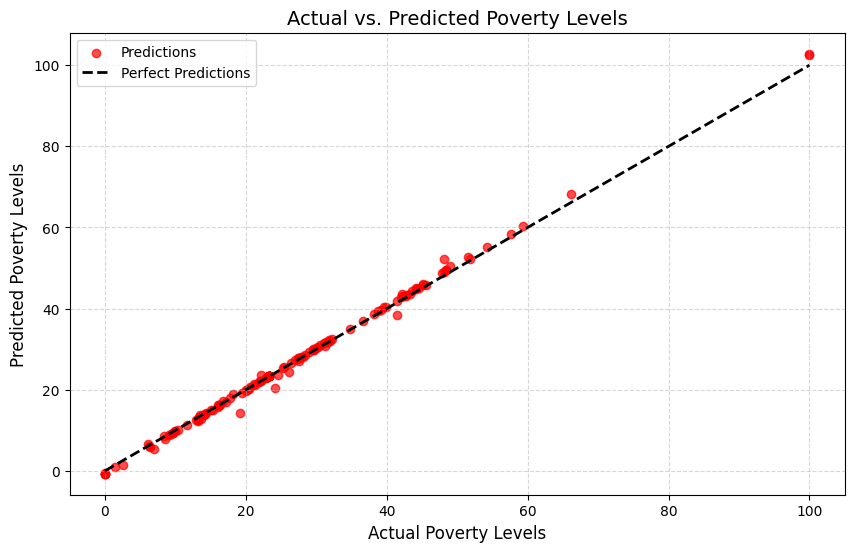

Training Mean Squared Error -  7.356941455173893
Testing Mean Squared Error -  0.8693321659503943
Training R2 Value -  0.968141663116242
Testing R2 Value -  0.9967881201940549


In [424]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test_pred, alpha=0.7, color='red', label='Predictions')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Predictions')


plt.xlabel('Actual Poverty Levels', fontsize=12)
plt.ylabel('Predicted Poverty Levels', fontsize=12)
plt.title('Actual vs. Predicted Poverty Levels', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

print("Training Mean Squared Error - " , train_mse)
print("Testing Mean Squared Error - " , test_mse)
print("Training R2 Value - " , train_r2)
print("Testing R2 Value - " , test_r2)

### Error Visualization

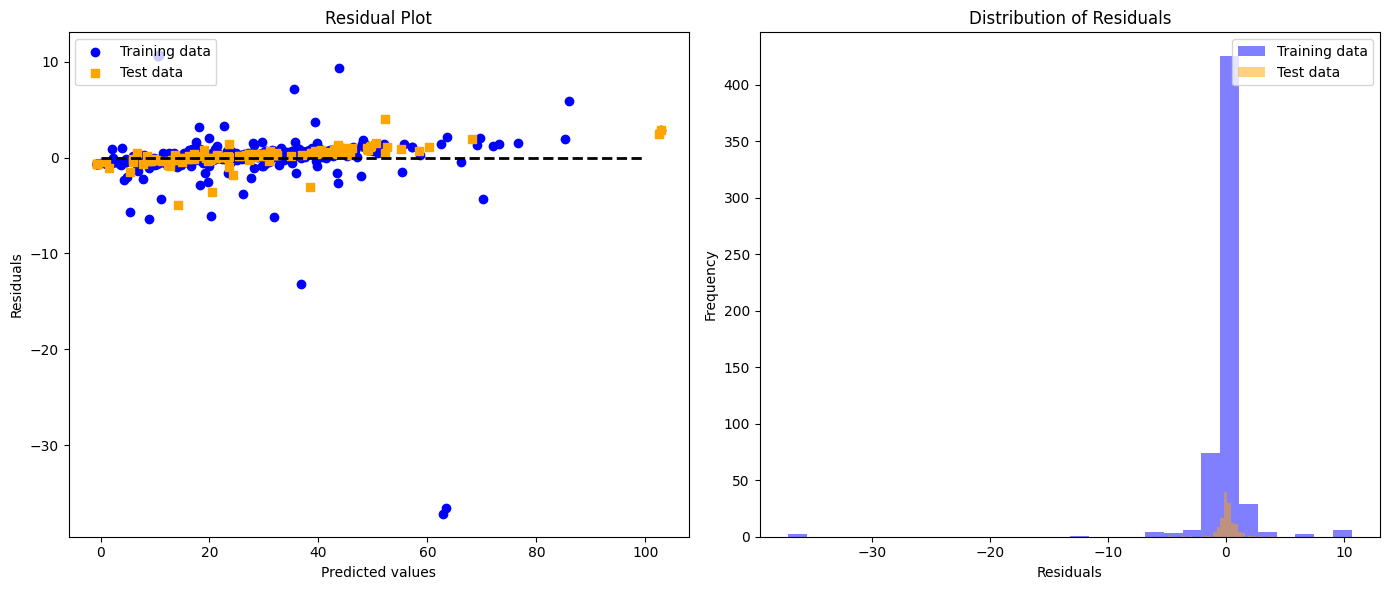

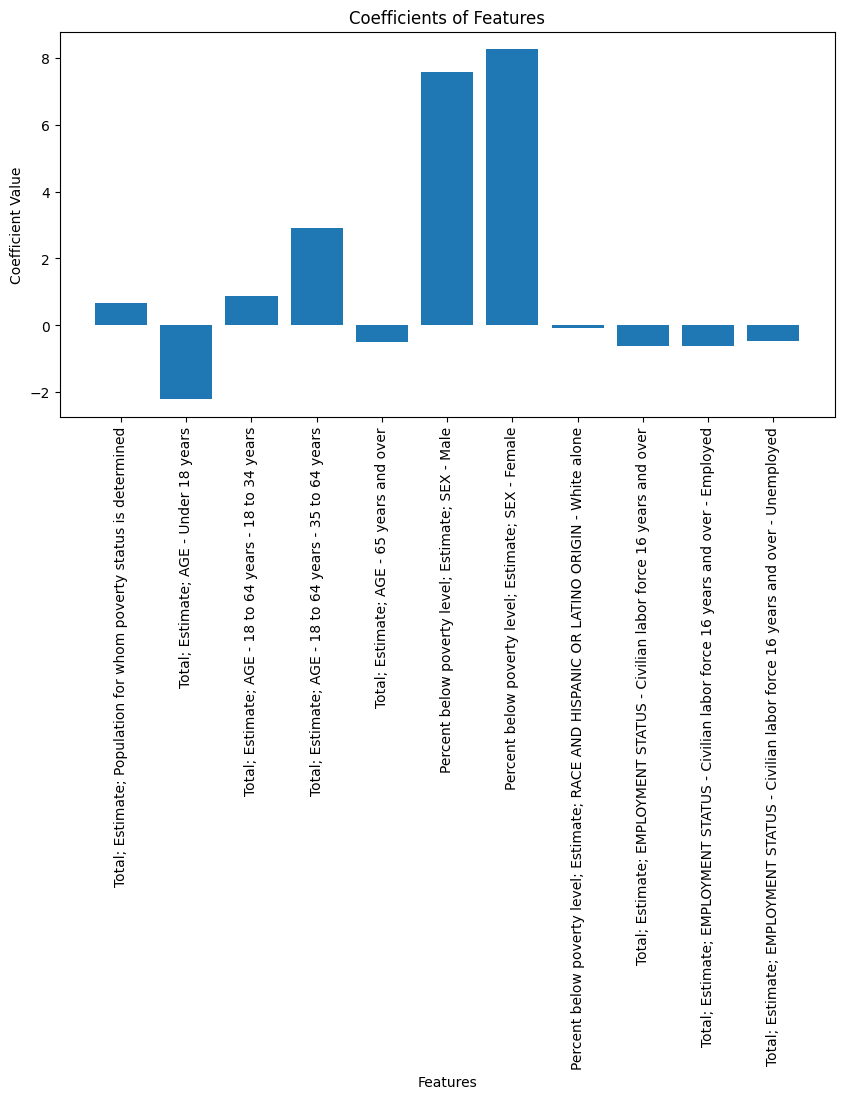

In [425]:
warnings.filterwarnings("ignore", message="Tight layout not applied")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='black', lw=2, linestyle='--')
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.hist(y_train_pred - y_train, bins=30, color='blue', alpha=0.5, label='Training data')
plt.hist(y_test_pred - y_test, bins=30, color='orange', alpha=0.5, label='Test data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
coefficients = model.coef_
names = X_train.columns
plt.bar(np.arange(len(names)), coefficients, tick_label=names)
plt.title('Coefficients of Features')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The results from the linear regression model used to predict the percentage of the population below the poverty level based on demographic and employment data indicate a highly effective predictive capability. Here's a more detailed breakdown of the conclusions drawn from the analysis:

### Model Performance
1. High Accuracy: The model achieved an R² score of nearly 0.997 on the test set, indicating that it can explain approximately 99.7% of the variance in poverty levels from the features selected. This exceptional performance suggests that the model captures the underlying patterns and relationships effectively.
2. Low Error: The Mean Squared Error (MSE) on the test set is very low at 0.87, suggesting that the model’s predictions are close to the actual data points.

### Predictions
1. Close Alignment: The comparison between actual and predicted poverty levels shows a close alignment for the majority of the entries. The model performs consistently across various entries, indicating robustness in its predictive capabilities.
2. Minor Discrepancies: While there are minor discrepancies, such as slight overestimations or underestimations, they are minimal and do not significantly detract from the model’s overall effectiveness.

### Practical Implications
1. Policy Making and Social Planning: The model can serve as a valuable tool for policymakers and social planners, helping them identify areas at risk of high poverty levels and allocate resources more effectively.
2. Targeted Interventions: By understanding the factors influencing poverty, interventions can be more precisely tailored to the needs of specific demographics or regions, potentially leading to more impactful social programs.


#### This code snippet creates a DataFrame specifically designed to compare actual poverty percentages with the corresponding predicted values from a machine learning model

In [426]:
comparison_df = pd.DataFrame({
    'Actual Poverty %': y_test,
    'Predicted Poverty %': y_test_pred
})

comparison_df.reset_index(drop=True, inplace=True)

comparison_df.head(10)  

,Actual Poverty %,Predicted Poverty %
0,0.0,-0.643673
1,31.6,31.874992
2,27.0,27.329336
3,23.3,23.394099
4,8.5,7.881858
5,22.1,22.113928
6,24.1,20.472683
7,30.3,30.593833
8,23.3,23.394099
9,28.1,28.115578


# Classification

#### This code snippet trains and evaluates three different machine learning models for predicting poverty levels
1. Logistic Regression
2. Decision Tree
3. Random Forest

#### It provides various metrics and visualizations to compare the performance of each model and gain insights into how well they classify individuals as below the poverty line or not

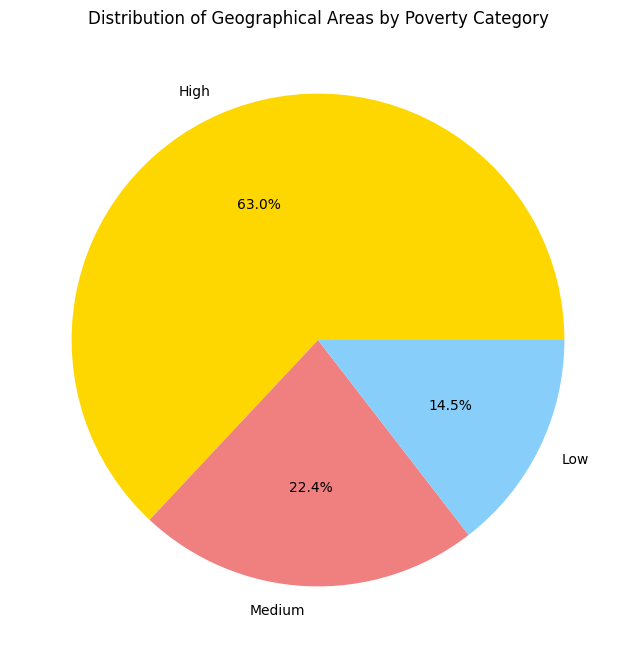

Logistic Regression Accuracy: 0.9640287769784173
              precision    recall  f1-score   support

        High       0.97      1.00      0.98        92
         Low       1.00      0.88      0.94        17
      Medium       0.93      0.90      0.92        30

    accuracy                           0.96       139
   macro avg       0.97      0.93      0.95       139
weighted avg       0.96      0.96      0.96       139



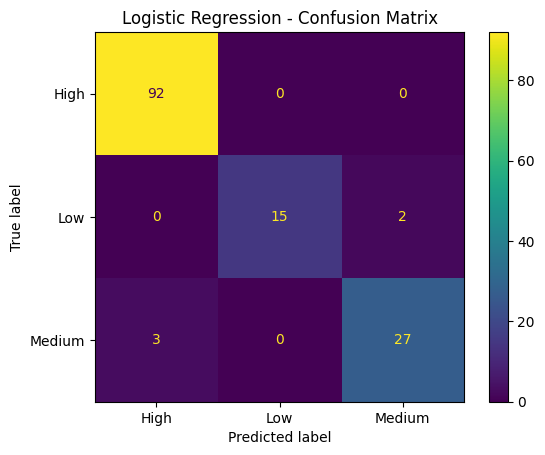

Decision Tree Accuracy: 0.9640287769784173
              precision    recall  f1-score   support

        High       0.97      0.99      0.98        92
         Low       1.00      0.94      0.97        17
      Medium       0.93      0.90      0.92        30

    accuracy                           0.96       139
   macro avg       0.97      0.94      0.95       139
weighted avg       0.96      0.96      0.96       139



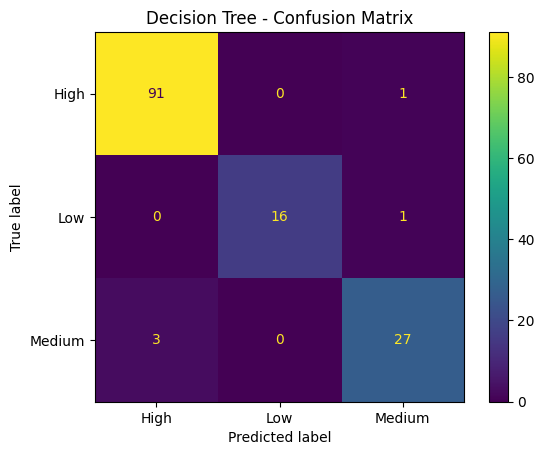

Random Forest Accuracy: 0.9784172661870504
              precision    recall  f1-score   support

        High       0.98      1.00      0.99        92
         Low       0.94      1.00      0.97        17
      Medium       1.00      0.90      0.95        30

    accuracy                           0.98       139
   macro avg       0.97      0.97      0.97       139
weighted avg       0.98      0.98      0.98       139



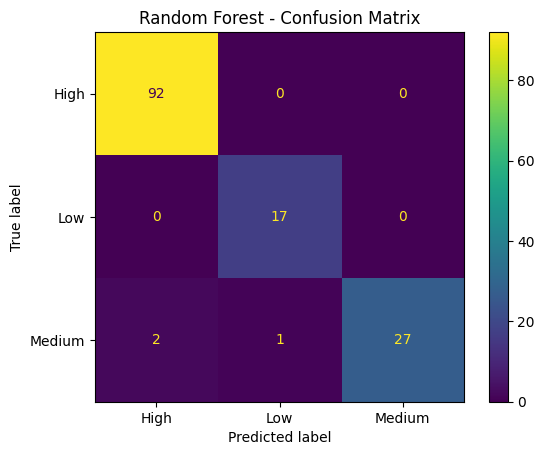

In [427]:
conditions = [
    (data['Percent below poverty level; Estimate; Population for whom poverty status is determined'] < 10),
    (data['Percent below poverty level; Estimate; Population for whom poverty status is determined'] >= 10) & 
    (data['Percent below poverty level; Estimate; Population for whom poverty status is determined'] <= 20),
    (data['Percent below poverty level; Estimate; Population for whom poverty status is determined'] > 20)
]
categories = ['Low', 'Medium', 'High']
data['Poverty Category'] = np.select(conditions, categories)

X = data[features.columns]
y = data['Poverty Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poverty_category_counts = data['Poverty Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(poverty_category_counts, labels=poverty_category_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Geographical Areas by Poverty Category')
plt.show()

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()
    

### Model Performance Comparison and Feature Importance

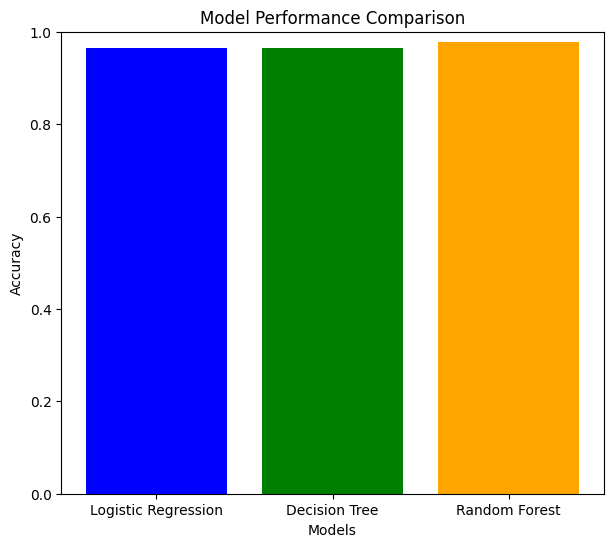

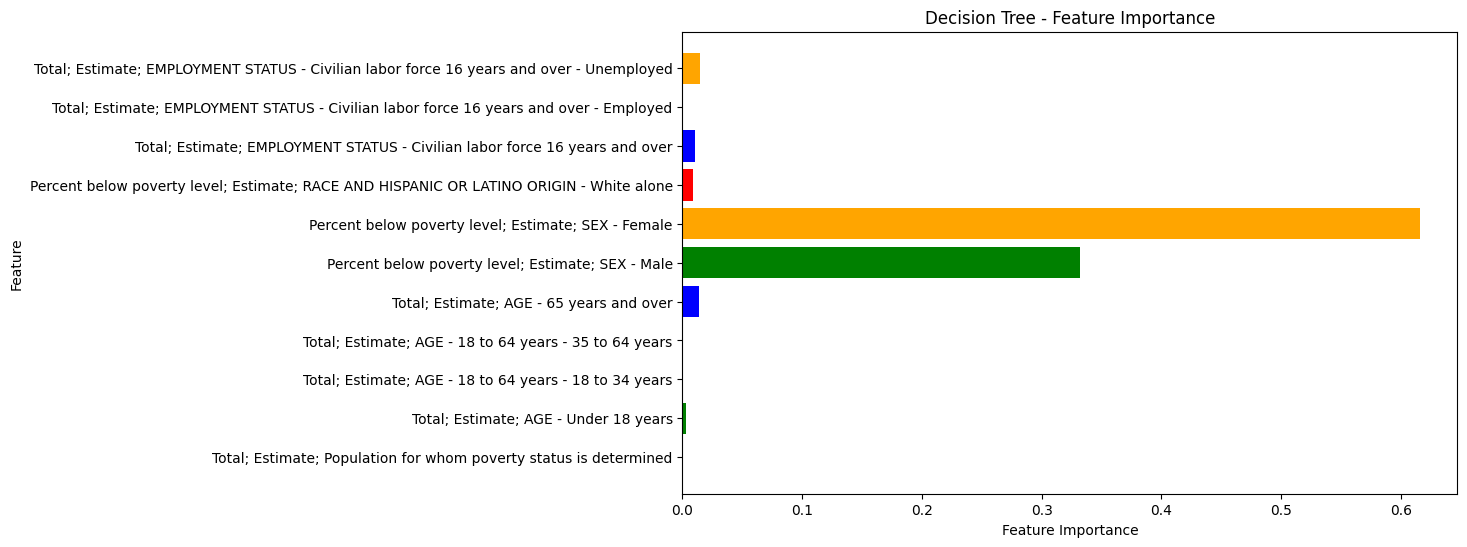

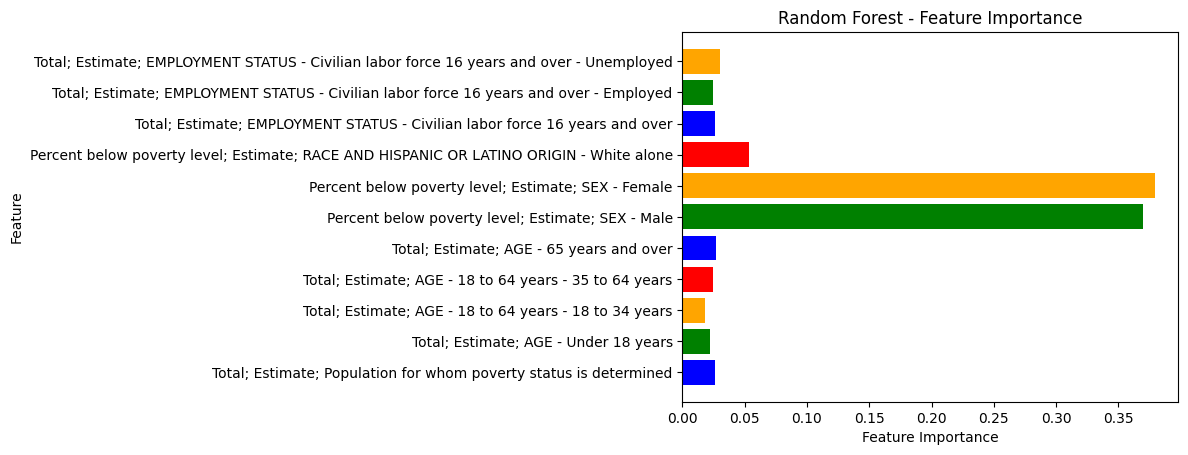

In [428]:
plt.figure(figsize=(7, 6))
accuracy_scores = [accuracy_score(y_test, model.predict(X_test_scaled)) for model in models.values()]
plt.bar(models.keys(), accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


if 'Decision Tree' in models or 'Random Forest' in models:
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier)):
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                plt.barh(X.columns, importances, color=['blue', 'green', 'orange', 'red'])
                plt.xlabel('Feature Importance')
                plt.ylabel('Feature')
                plt.title(f'{name} - Feature Importance')
                plt.show()

### ROC Curves and Precision-Recall Curves

- ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
- Precision-Recall curve is a graphical plot of the precision and recall (sensitivity) of a binary classification model at various threshold settings.
It illustrates the trade-off between precision and recall for different threshold values.
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations (TP / TP + FP), indicating the accuracy of positive predictions.

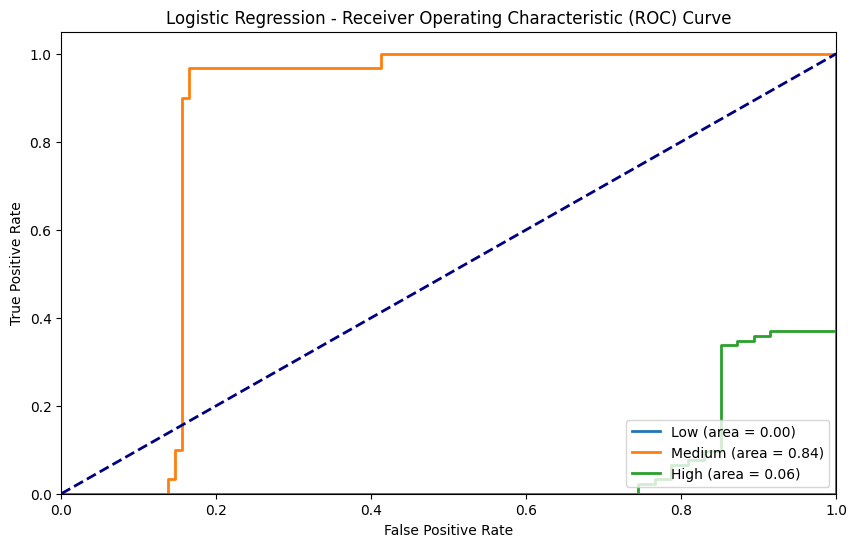

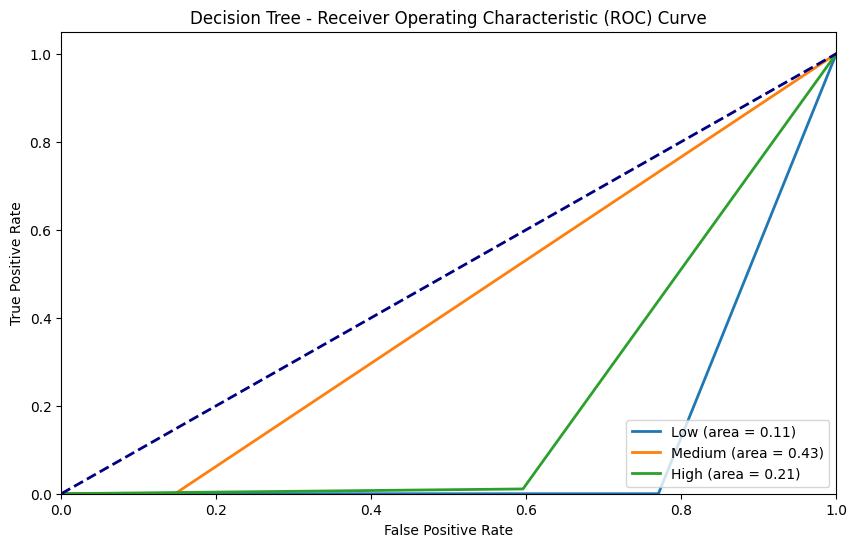

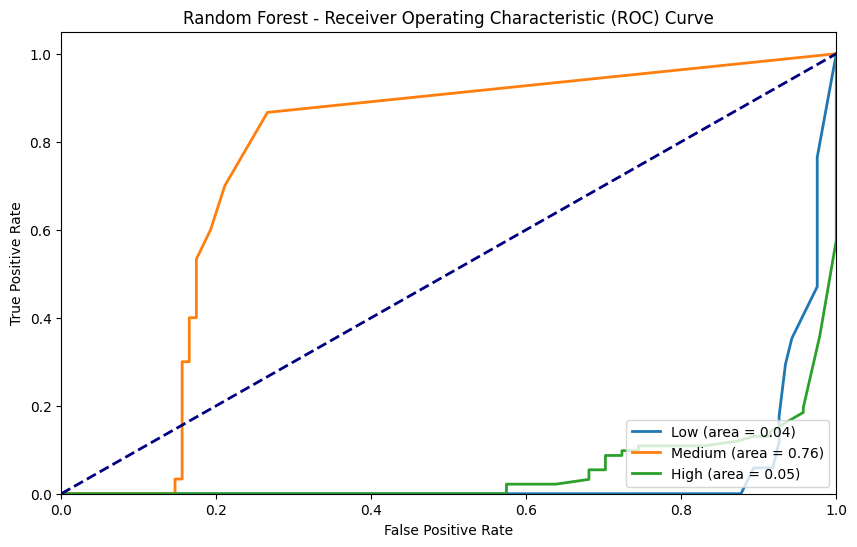

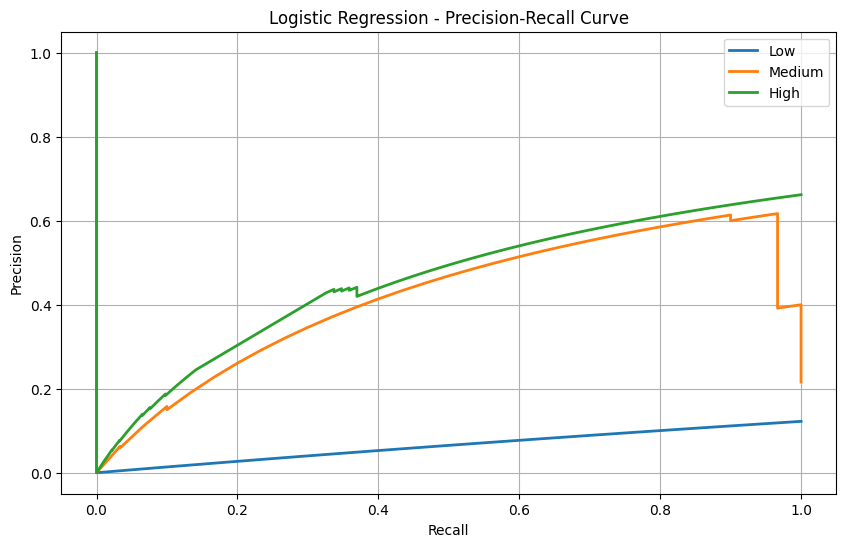

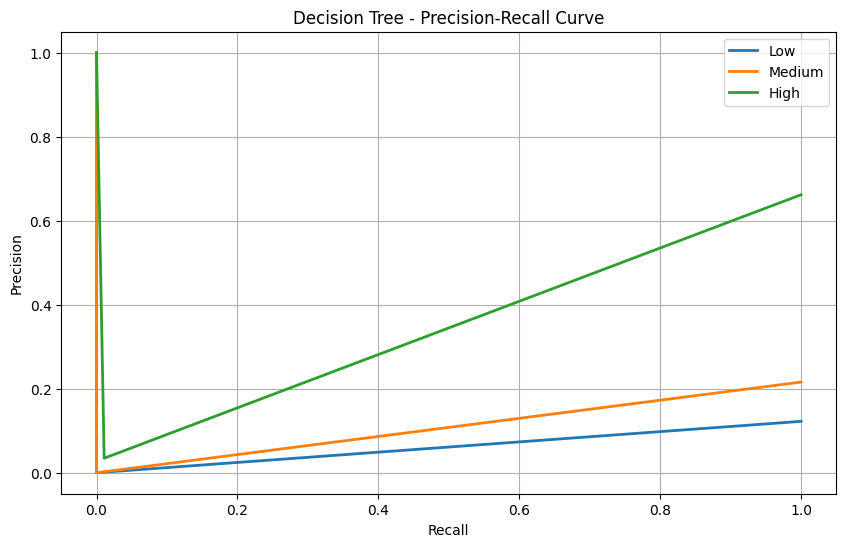

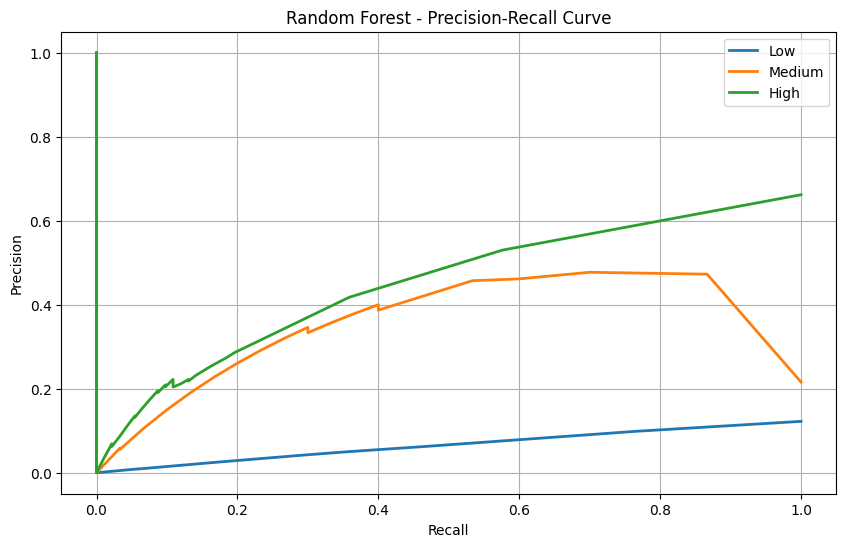

In [429]:
y_test_binary = label_binarize(y_test, classes=['Low', 'Medium', 'High'])

for name, model in models.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    for i in range(len(categories)):
        y_score = model.predict_proba(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{categories[i]} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc='lower right')
    plt.show()

for name, model in models.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    for i in range(len(categories)):
        y_score = model.predict_proba(X_test_scaled)
        precision, recall, _ = precision_recall_curve(y_test_binary[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{categories[i]}')
    plt.legend()
    plt.show()
